In [ ]:
import os
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-05-01 05:38:41--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.217.13.80, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   217MB/s    in 0.4s    

2021-05-01 05:38:42 (217 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_train = InceptionV3(input_shape=(150,150,3),
                        include_top = False,
                        weights = None)
pre_train.load_weights(local_weights_file)

In [ ]:
for layer in pre_train.layers:
  layer.trainable = False

In [ ]:
pre_train.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
last_layer = pre_train.get_layer('mixed7')
last_output = last_layer.output
print(last_output)

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation= 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation = 'sigmoid')(x)
model = Model(pre_train.input, x)
model.compile(optimizer = RMSprop(lr = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)


train_datagen = ImageDataGenerator(rescale = 1./255.0,
                                   rotation_range = 40,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   shear_range = 0.3,
                                   zoom_range = 0.5,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255.0)

train_gen = train_datagen.flow_from_directory(train_dir,
                                              batch_size = 10,
                                              class_mode = 'binary',
                                              target_size = (150,150))
valid_gen = test_datagen.flow_from_directory(validation_dir,
                                             batch_size = 10,
                                             class_mode = 'binary',
                                             target_size = (150,150))

--2021-05-01 05:39:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.9.208, 172.217.12.240, 172.217.164.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.9.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   126MB/s    in 0.5s    

2021-05-01 05:39:05 (126 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_gen,
                    validation_data = valid_gen,
                    steps_per_epoch = 200,
                    epochs = 30,
                    validation_steps = 100,
                    verbose = 2)

Epoch 1/30
200/200 - 54s - loss: 0.4190 - accuracy: 0.8280 - val_loss: 0.1170 - val_accuracy: 0.9510
Epoch 2/30
200/200 - 18s - loss: 0.3273 - accuracy: 0.8785 - val_loss: 0.1414 - val_accuracy: 0.9500
Epoch 3/30
200/200 - 18s - loss: 0.3132 - accuracy: 0.8810 - val_loss: 0.1120 - val_accuracy: 0.9610
Epoch 4/30
200/200 - 18s - loss: 0.3097 - accuracy: 0.8950 - val_loss: 0.2060 - val_accuracy: 0.9440
Epoch 5/30
200/200 - 18s - loss: 0.2959 - accuracy: 0.8920 - val_loss: 0.1551 - val_accuracy: 0.9550
Epoch 6/30
200/200 - 18s - loss: 0.2478 - accuracy: 0.9000 - val_loss: 0.1328 - val_accuracy: 0.9580
Epoch 7/30
200/200 - 18s - loss: 0.2844 - accuracy: 0.9030 - val_loss: 0.1179 - val_accuracy: 0.9660
Epoch 8/30
200/200 - 18s - loss: 0.2721 - accuracy: 0.9040 - val_loss: 0.1240 - val_accuracy: 0.9650
Epoch 9/30
200/200 - 18s - loss: 0.2720 - accuracy: 0.9020 - val_loss: 0.2215 - val_accuracy: 0.9440
Epoch 10/30
200/200 - 18s - loss: 0.2724 - accuracy: 0.9020 - val_loss: 0.1323 - val_accura

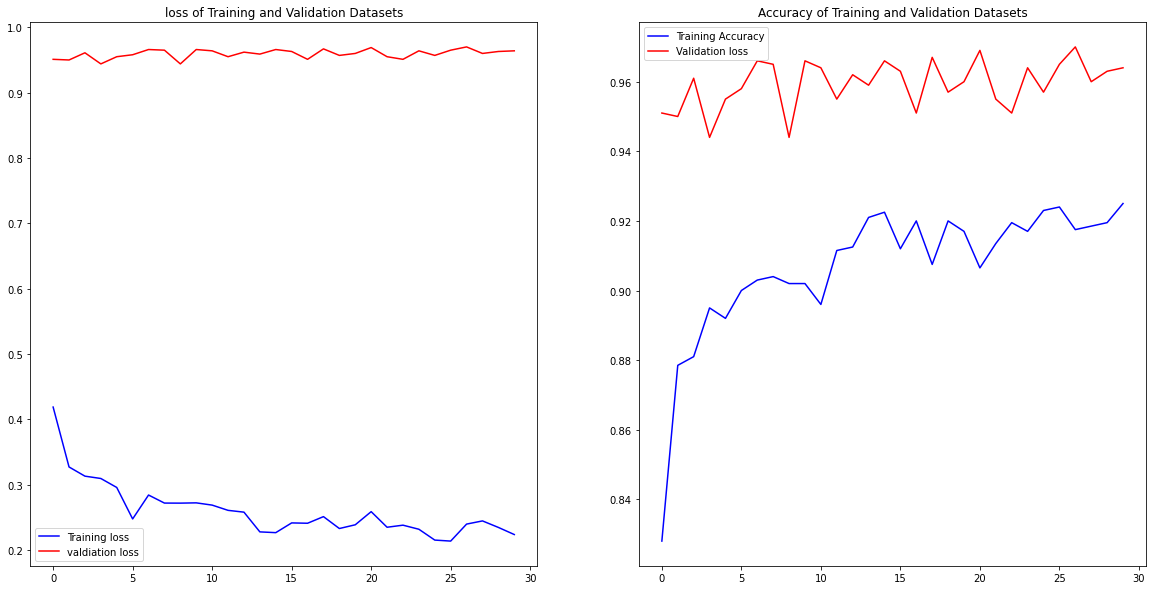

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label = "Training loss")
plt.plot(epochs, val_acc, 'r', label = "valdiation loss")
plt.title("loss of Training and Validation Datasets")
plt.legend(loc=0)
plt.show

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'b', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Validation loss")
plt.title("Accuracy of Training and Validation Datasets")
plt.legend(loc=0)
plt.show()
